# **1.Import Library**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

# **2.Read Csv**

In [74]:
df=pd.read_csv("/content/Data Analytics  split.csv",skiprows=1)

#**3.Size Of The Data**

In [75]:
df.shape

(2015, 15)

# **4.Check Missing Values**

In [76]:
df.isnull().sum()

Name                         15
Ticker                       15
Sub-Sector                   68
Market Cap                   15
Close Price                  15
PE Ratio                     58
Return on Equity            145
Return on Assets             48
Net Proﬁt Margin             62
5Y Avg EBITDA Margin        135
EBITDA Margin                62
1Y Return vs Nifty           15
5Y CAGR                     422
Debt to Equity              180
Long Term Debt to Equity    182
dtype: int64

# **5.Drop values from the data where company name is null**

In [77]:
df=df.dropna(subset=['Name'])

In [78]:
df.isnull().sum()

Name                          0
Ticker                        0
Sub-Sector                   53
Market Cap                    0
Close Price                   0
PE Ratio                     43
Return on Equity            130
Return on Assets             48
Net Proﬁt Margin             47
5Y Avg EBITDA Margin        120
EBITDA Margin                47
1Y Return vs Nifty            0
5Y CAGR                     407
Debt to Equity              165
Long Term Debt to Equity    167
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2013
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Ticker                    2000 non-null   object 
 2   Sub-Sector                1947 non-null   object 
 3   Market Cap                2000 non-null   float64
 4   Close Price               2000 non-null   float64
 5   PE Ratio                  1957 non-null   float64
 6   Return on Equity          1870 non-null   float64
 7   Return on Assets          1952 non-null   float64
 8   Net Proﬁt Margin          1953 non-null   float64
 9   5Y Avg EBITDA Margin      1880 non-null   float64
 10  EBITDA Margin             1953 non-null   float64
 11  1Y Return vs Nifty        2000 non-null   float64
 12  5Y CAGR                   1593 non-null   float64
 13  Debt to Equity            1835 non-null   float64
 14  Long Ter

#6.**In data almost 2.5% values of Sub Sector is null drop them**
i have no idea which company is blong to wich sub-sector

In [80]:
df=df.dropna(subset=['Sub-Sector'])

# **7.in data numerical continues values have missing values i will fill them to mean**

In [81]:
df.describe()

,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity
count,1.947000e+03,1947.000000,1.908000e+03,1824.000000,1903.000000,1.904000e+03,1839.000000,1904.000000,1947.000000,1570.000000,1787.000000,1785.000000
mean,1.346959e+04,749.866174,4.677989e+15,5.224347,5.043757,-6.431191e+02,-240.276460,-88.905639,99.832741,13.815676,140.604756,78.129701
std,6.746123e+04,2523.482960,2.043377e+17,99.139988,17.596426,2.687663e+04,9648.047091,3884.966909,517.757038,28.444384,1379.138762,617.711065
min,1.249950e+02,0.200000,-6.046040e+03,-3170.204082,-260.337553,-1.172500e+06,-412176.819645,-168980.000000,-99.414554,-53.830928,0.000000,0.000000
25%,3.136396e+02,81.900000,6.761304e+00,2.120491,0.503505,9.181997e-01,7.927618,8.092970,-11.502973,-2.309591,5.443725,0.583431
50%,1.059327e+03,225.750000,2.067297e+01,9.546071,4.045901,5.813720e+00,13.550183,14.723659,24.505954,9.495240,29.551211,8.655229
75%,5.130832e+03,625.950000,4.655440e+01,17.397829,9.443002,1.242438e+01,21.103673,24.176939,97.419591,24.917170,82.641343,37.641387
max,1.679534e+06,66876.350000,8.925604e+18,1059.713467,480.834915,2.443590e+03,430.283277,2635.897436,18121.401250,344.709661,48909.090910,18638.057010


# **fill null values with mean**

In [82]:
imputer=SimpleImputer(strategy='mean')
for col in df.columns:
  if df[col].dtype=='object':
    continue
  df[col]=imputer.fit_transform(df[col].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [83]:
df.isnull().sum()

Name                        0
Ticker                      0
Sub-Sector                  0
Market Cap                  0
Close Price                 0
PE Ratio                    0
Return on Equity            0
Return on Assets            0
Net Proﬁt Margin            0
5Y Avg EBITDA Margin        0
EBITDA Margin               0
1Y Return vs Nifty          0
5Y CAGR                     0
Debt to Equity              0
Long Term Debt to Equity    0
dtype: int64

# **Data is not completly clean but for this task its enough**

In [84]:
df.to_csv('Data_Analytics_Clean.csv')

# **Problem 1**

In [102]:
px.bar(df,x='Sub-Sector',y='Name')

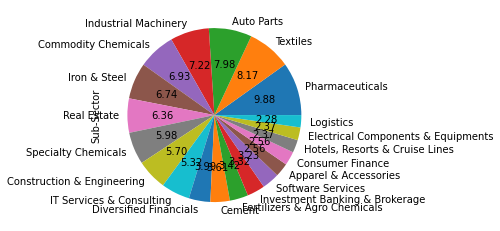

In [85]:
#plot top 20 sub-secotr
df['Sub-Sector'].value_counts().sort_values(ascending=False)[:20].plot(kind='pie',autopct="%.2f")

# **Problem 2**

In [86]:
df.head()

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Reﬁning & Marketing,1.679534e+06,2467.40,34.186904,7.793277,3.957021,9.725370,17.720494,20.433809,2.412295,31.316180,33.855037,22.831210
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.70,41.892356,37.740680,25.932382,19.383065,29.072528,28.965220,2.801648,23.874994,8.948661,7.465445
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.50,25.779258,16.435200,1.883433,20.420916,28.206116,28.342094,-16.833310,15.587857,140.604756,78.129701
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.178853,27.135305,19.417895,18.847214,28.656802,29.306634,21.730844,29.114535,6.935219,5.974056
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.212283,12.382897,1.243333,11.395012,11.900543,16.963554,5.055258,23.506987,140.604756,78.129701


In [87]:
df['Market Cap'].max()

1679534.21

In [88]:
df['Market_Cap_Categories']=np.where(df['Market Cap']>20000,'Large',np.where(df['Market Cap']<5000,'Small','Meduim'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



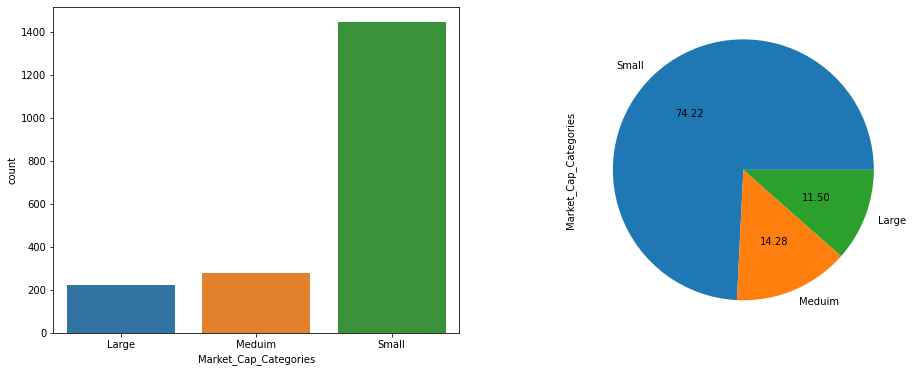

In [110]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(df['Market_Cap_Categories'])
plt.subplot(1,2,2)
df['Market_Cap_Categories'].value_counts().plot(kind='pie',autopct="%.2f")

# **Problem 3**

**V=(EPS*(8.5+2g)*6)/Y**

V : Intrinsic Value
EPS : The Company’s last 12 month earnings per
share

8.5 : The constant represents the appropriate 

P-E ratio for a no-growth
 company as proposed by Graham.

g : The company's long-term (five years) earnings growth estimate

6 : The average Return of FDs (6%)

Y : The current yield on AAA corporate bonds

In [90]:
#take 10 random company from data
company_10=df.sample(10)

In [91]:
company_10.head()

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity,Market_Cap_Categories
1643,Hindustan Motors Ltd,HINDMOTORS,Four Wheelers,242.044780,11.90,64.202859,5.224347,13.531945,30.952381,38.541759,58.702791,56.365016,4.280698,140.604756,78.129701,Small
1906,United Polyfab Gujarat Ltd,UNITEDPOLY,Textiles,152.108253,69.00,286.996704,1.147186,0.293377,0.252189,11.918643,11.443662,406.628521,66.452785,190.015063,187.540349,Small
772,S H Kelkar and Company Ltd,SHK,Specialty Chemicals,1987.722702,142.65,13.736854,16.175550,8.663944,10.587469,16.211708,20.141800,7.461231,-13.889814,54.232796,34.736059,Small
1519,Jaykay Enterprises Ltd,JAYKAY,Investment Banking & Brokerage,305.780219,64.30,11.747223,33.053968,31.397383,83.003827,33.148461,83.418367,78.454954,62.815194,0.000000,0.000000,Small
1438,Maral Overseas Ltd,MARALOVER,Textiles,375.024780,89.20,29.906282,13.825799,2.868843,1.959865,6.892502,9.599275,175.404516,19.732312,201.597542,49.052739,Small


**Intrinsic Value for g(growth) good (15% growth)**

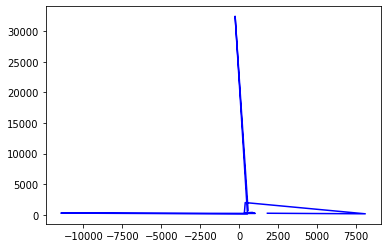

In [96]:
company_10['Intrinsic_Value_good']=(company_10['PE Ratio']*(8.5+15)*6)/5
plt.plot(company_10['Intrinsic_Value_good'],company_10['Market Cap'],color='blue')

**Intrinsic Value for g(growth) bad (-5% growth)**

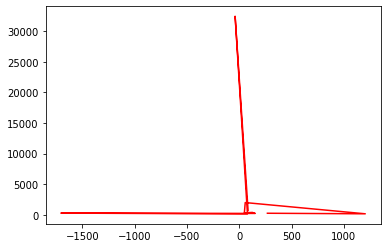

In [97]:
company_10['Intrinsic_Value_bad']=(company_10['PE Ratio']*(8.5-5)*6)/5
plt.plot(company_10['Intrinsic_Value_bad'],company_10['Market Cap'],color='red')

**trinsic Value for g(growth) best (25% growth)**

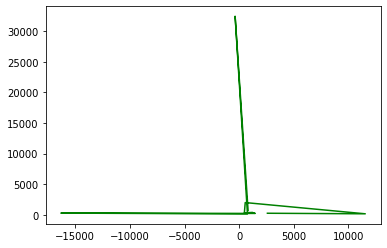

In [98]:
company_10['Intrinsic_Value_best']=(company_10['PE Ratio']*(8.5+25)*6)/5
plt.plot(company_10['Intrinsic_Value_best'],company_10['Market Cap'],color='green')

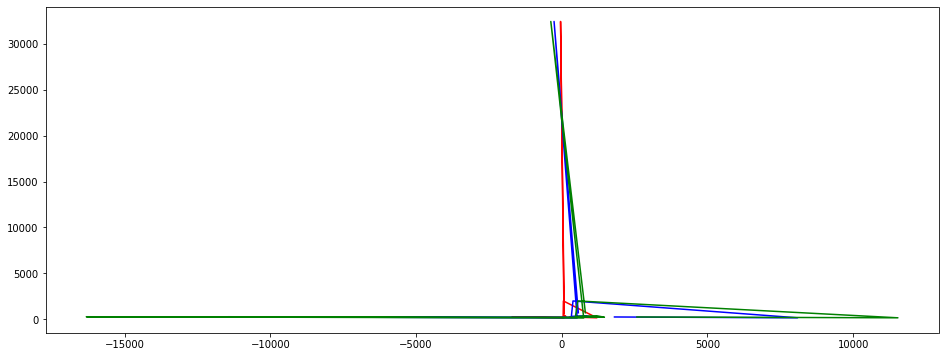

In [99]:
#visualize all together
plt.figure(figsize=(16,6))
plt.plot(company_10['Intrinsic_Value_bad'],company_10['Market Cap'],color='red')
plt.plot(company_10['Intrinsic_Value_good'],company_10['Market Cap'],color='blue')
plt.plot(company_10['Intrinsic_Value_best'],company_10['Market Cap'],color='green')